# Abstract
Digit recognition plays crucial role in various aspects such as document processing, security systems or historical data analysis (Shamim et al. 2018). This project aims to explore effective methods in handwritten digit analysis using machine learning techniques. In this study a MNIST dataset consisting of a large collection of handwritten digits was used as a primary data source. 

The study included preprocessing the dataset by standardizing the picture sizes, changing over them into numerical representations, and applying essential changes to improve the quality of the information. To analyze the performance of the model various evaluation methods were implemented. Furthermore, a confusion matrix was used to classify the information in detail. 

Subsequently, different alternatives of handwritten digit analysis such as KD-Trees, KNN – Classifier, Support Vector Machine – Classifier (SVM) and Convolutional Neuronal Network (CNN) were implemented and evaluated in context of recognition of diverse patterns of handwritten digits. 

# Introduction

In this project, our goal is to have handwritten digits recognized and matched by a self-implemented algorithm. 

The motivation for this project lies in the increasing importance of automatic digit recognition. From personnel data recognition to automatic evaluation of exams, the ability to recognize handwritten digits accurately and efficiently can significantly speed up many different processes, helping to increase efficiency. 

Several approaches have become established in the state-of-the-art of digit recognition. KNN is a simple but powerful algorithm that has been successfully used in many fields. It is based on the idea that similar data points tend to have similar output values. By using KNN, we can determine the class membership of an unknown data point based on the majority of its nearest neighbors (Ertel, 2021). However, the performance of the KNN algorithm can be affected by the high dimensionality of the data (Trevor et al., 2009). This is where the dimensionality reduction technique PCA comes into play.

In this work, we take advantage of PCA to reduce the dimensionality of the large MNIST dataset while extracting important features. By transforming the original features into new variables called principal components, we can represent the data more efficiently (Bro and Smilde, 2014). In summary, we want to reduce the number of variables while retaining as much information as possible to simplify the computation of the KNN. 

Another variant for digit recognition is the Convolutional Neural Network (CNN). CNN can extract complex features directly from raw data compared to KNN and PCA is not required. Another advantage of CNN is that it can recognize shapes, in our case digits, regardless of spatial arrangement, whereas KNN only compares pixels at the same position from the different images (Liu et al., 2003).
However, CNN is much more complex and difficult to understand than KNN. CNN often requires a larger amount of training data and also strong computational power. KNN is a simple and intuitive method and is quite sufficient in our context (Liu et al., 2003).

Our project starts with the application of PCA to our 60,000 training images and then the implementation of the KNN algorithm. Finally, we analyze the accuracy of our algorithm with respect to many different aspects: What is the accuracy of our algorithm? How does the accuracy change when varying the k and pc values? How fast is the calculation of the accuracy compared to fully implemented KNN algorithms? Finally, it is also important how to improve the accuracy. For this purpose, we performed an error analysis and checked which class of digits is often misrecognized by the algorithm and considered how to counteract this.


# Materials
## Used libraries

### Pandas
**Version 2.0.2**

We used the Pandas library to import our MNIST dataset and to create so-called "DataFrames". A dataframe is a twodimensional data structure with rows and columns. It is similar to a table, but each column can contain a different data type. In our case, we created a dataframe where the euclidean distances between a test image and all training images were sorted in ascending order. This then allowed us to display the labels of the k-nearest-neighbors. Also the tables for the accuracy calculation were first created as a dataframe and then converted into a csv file (GeeksForGeeks, 2023).

### NumPy
**Version 1.24.3**

NumPy is used for a variety of mathematical operations, for example, root extraction in the calculation of euclidean distance. Numpy also allows us to create and merge arrays. With NumPy's arrays, functions can be applied to the entire array instead of individual elements (Bernhard Grotz). NumPy can be extended with SciPy so that even more mathematical operations are possible. One operation we used from SciPy is KD-Tree, which allows us to compare our accuracy with the ready to use implementation of SciPy (Bernd Klein).

### Matplotlib
**Version 3.7.1**

Matplotlib is a Python library for visualizing data in the form of various types of graphs. Examples are: Line charts, heat maps and bar charts (The-Matplotlib-development-team). In our code, we created the confusion matrix in the form of a heat map and a bar chart that shows us what percentage of the numbers 0 to 9 are in our test and training set. All the plots help us to visualize our results for the reader of this report, but also for ourselves, and thus make them easier to understand. 

### Scikit-learn
**Version 1.2.2**

We have used several functions from Scikit-learn. These include the Z-transform, PCA, KNeighborsClassifier and KD-Trees. The functions we implemented made it easier for us to analyze our results and made our code more efficient. For example, we were able to narrow down the range in which the maximum k-value resides using KD-trees.

### Tensorflow
**Version 2.13.0**

For CNN we used additionally tensorflow. This library contains many mathematical functions and operations, which are necessary for the training and execution of a CNN. Examples are: setting up layers (Convolution, Max Pooling, Flatten, Fully connected) in the CNN model, specifying the settings necessary for training, adjusting weights and biases of model and evaluating the models performance on the testing data.

# Methods

## Z-Transform
Z-Transform is a technique used in correlation analysis to transform correlation values between variables into values that statistically are more significant. This transformation also converts correlation values between -1 and 1 to -∞ to +∞.

Using the formula for z-transform we can standardize our data. 
(1)  $$ z={(x-x̄)\over s} $$ 

In this formula x represents the value of a variable. The x̄ represents the average value of the variable x across the dataset. It is calculated by summing all the values and dividing by the number of observations. The spread or dispersion of the variable x is measured by the standard deviation, s.


## Principal Component Analysis (PCA)
Principle Component Analysis (PCA) transforms a whole set of raw data into a set of new variables called principal components, which are linear combinations of the original variables. The principal components are ordered in order of decreasing importance, with the first principal component explaining the greatest variance in the data.

Our dataset consists of 784 dimensions (28x28). To conduct the principal component analysis few steps are necessary. Firstly, the data needs to be standardized. This includes which means converting it into a set with a mean of zero and a variance of one. Then using the standardized data, the covariance matrix or correlation matrix is calculated. The matrix allows then the calculation of eigenvectors and eigenvalues. The eigenvectors represent the directions of the greatest variance in the data, and the eigenvalues tell the proportion of variance explained by each principal component.

The next step in PCA is choosing the number of principal components which will be kept. This can be done based on various criteria, such as the elbow criterion, the criterion of the sum of explained variance, or the criterion of minimizing the reconstruction error. After selecting the appropriate number of principal components, the raw data can be transformed into principal components space.

## K-nearest neighbors (KNN)
K-nearest neighbors (KNN) is a non-parametric, lazy, supervised machine learning classification algorithm. Non-parametric means that KNN does not assume any specific distribution for the dataset a priori. Lazy in this context means that the data is stored while the algorithm is trained and preprocessed during the testing phase. A supervised algorithm is trained on data that is well labeled. KNN predicts the class of a new data point by majority of votes of K-nearest neighbors based on similarity measure determined by a distance function. For the implementation of our algorithm, we computed the Euclidean distance, which is the square root of the sum of squared distance between the test data point and all the training data images in an n-dimensional space, whereby n is determined by the reduction of dimensions employing PCA. After calculating the distances, they are sorted in ascending order. The K-nearest neighbors are then determined by selecting the top K rows from the sorted array. The predicted class of the test data point is determined by a majority vote of these neighbors. To evaluate the accuracy of the KNN algorithm, the number of correctly classified test data points is divided by the total number of test data points. 

## KD-Trees
K-dimensional trees (short: KD-trees) is a fast way to find the nearest neighbor to each of the 10,000 test images and thus assign a label to the test image. It is an optimized version of the KNN algorithm already implemented by SciPy. It differs from our algorithm by not comparing the test point in n-dimensional space with all 60,000 training data, but by narrowing down the area in which the training point closest to the test point is searched. This works as follows: Our training data can be thought of as points in an n-dimensional space. The training data is then divided into groups. For simplicity, we could think of this as two-dimensional (Fig. 1).

**Figure 1:** Scatter plot with random 2D coordinates to explain KD Tree 

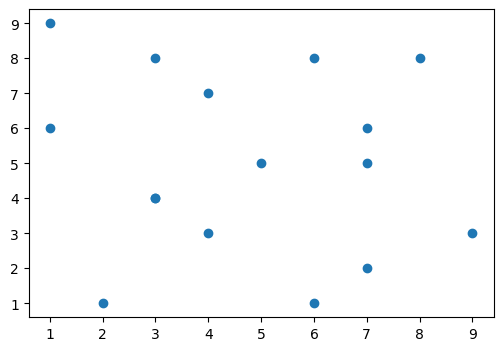

In [22]:
import matplotlib.pyplot as plt

x = [6,7,8,7,2,1,9,4,3,6,1,3,4,5,7,3]
y = [1,5,8,2,1,6,3,7,4,8,9,4,3,5,6,8]
plt.figure(figsize=(6, 4))
plt.scatter(x, y)
plt.show()

In a two-dimensional space, this would mean that we would first divide the scatter plot in the middle along the vertical. The division is always done by a "division point" (already existing point of the training dataset), which means that all points that are on the right of "division point" in the first division belong to the first subgroup and all points that are on the left of it belong to the other subgroup. Then we divide the two subgroups into two again, but now using the x-axis. The division is done in such a way that we get subgroups that contain as nearly as possible the same number of data points (Fig. 2).

**Figure 2:** Division of our scatter plot from figure 1 into subgroups to illustrate KD Tree

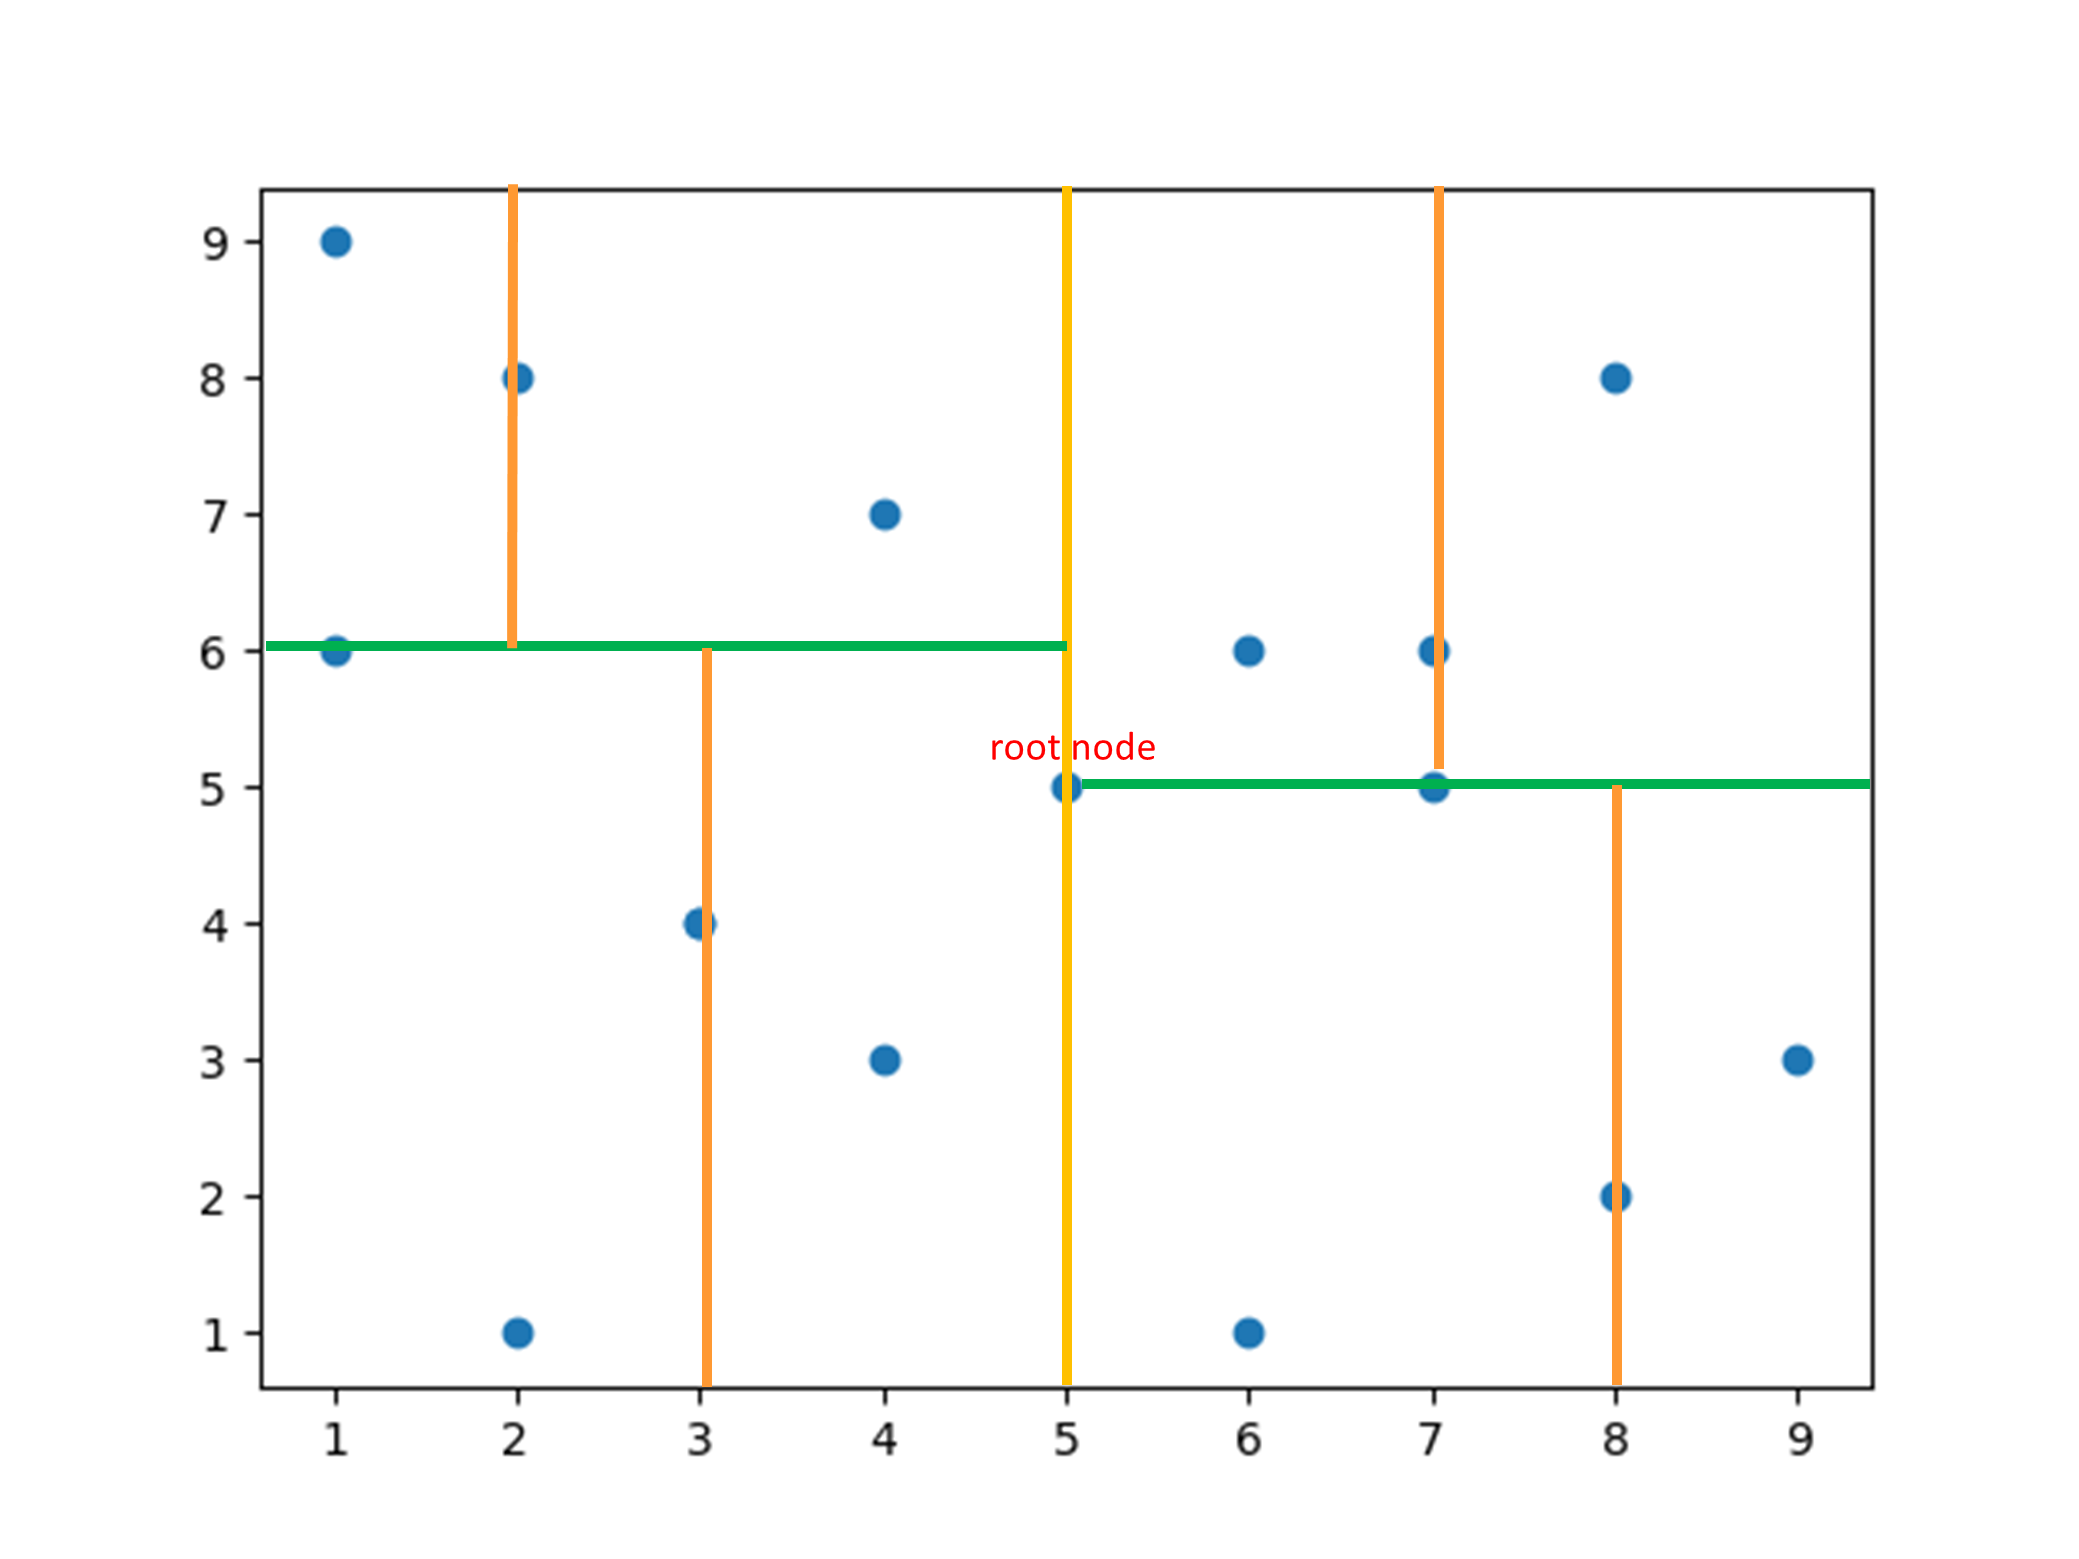

In [26]:
from IPython.display import Image, display
display (Image('Figures Report/Figure_2.png', width='50%'))

The division of the data set is done until the leafsize is reached. The leafsize indicates how many data points a subgroup must have minimally in order to be divided into two subgroups again (Haran, 2022). For example, if the leafsize is 10, then the last subgroup of the tree would contain five data points (since the splits are always balanced) (scikit-learn).  

The first division point we used is now our "root node". From the root node two new division points emerge, one division point is within the area to the left of the root node and the other is in the area to the right. The result is a tree diagram in which two paths emerge from each division point (Fig. 3).

**Figure 3:** Tree diagram of the scatter plot from figure 1 after the division into subgroups in figure 2 

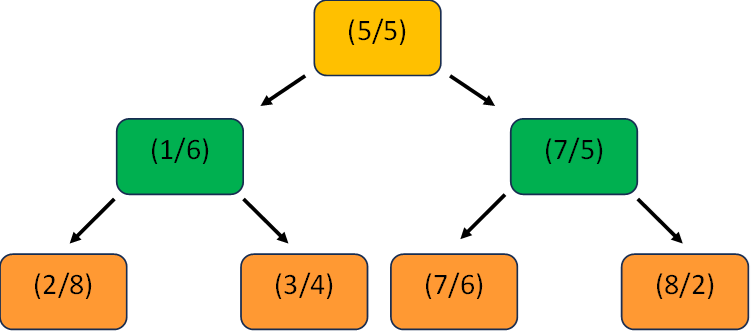

In [27]:
display (Image('Figures Report/KD_tree.png',width='50%'))

If we now place a test point in the n-dimensional space, we start by comparing the coordinates of the point with the root node. Assuming the point is to the left of the root node, we walk down the path to the second division point on the left. The test point is compared a second time and the algorithm again selects the division point whose Euclidean distance is closer to our test point. This is done until we reach the end point of the tree (Haran, 2022). 

Since we cannot assume that the endpoint of the tree is the nearest neighbor, we end up going back the path on the tree and eliminate all other possibilities by calculating the distance. We only go back as far as it makes sense to do so. For example, if a point is in the lower left corner, it is not worth calculating the distance between this point and the points that are in another subgroup in the upper right, because we can say with 100% probability that this point will not be closer to the test point than the one we have determined.

In the end, the algorithm saves the distance calculation between test data point and the training data points that are too far away from the test data point, which makes the algorithm deliver the predictions faster than our KNN (Haran, 2022). 

## KNeighborsClassifier
This function is another way to replace our KNN. The function automatically decides which algorithm to use for calculating the nearest neighbors (unless you change the parameters to a preferred calculation type). There are the following calculation options: "BallTree", "KD-Tree" and "brute" (scikit-learn). Brute force is calculated in the same way as our KNN, i.e. all data points are considered. "Ball Tree" works similar to KD Tree, but with Ball Tree the dataset is divided by a circle (2D) or a sphere (3D). The end result is a tree diagram, where the root node is the starting sphere/circle and starting from the root node two paths lead to the subgroups (Hucker, 2020). If the function is set to automatic, it decides on the basis of the data set which calculation of the nearest neighbors is most efficient (scikit-learn). 

## Confusion matrix
To classify results a two-dimensional confusion matrix can be used. It summarizes the classification results by comparing predicted labels to actual values. Confusion matrix consists of four main rates: true positive (TP), true negative (TN), false positive (FP) and false negative (FN).
Based on confusion matrix different evaluation metrics such as accuracy, recall, F-1 score, and precision can be calculated. 

Accuracy is a metric that measures the overall performance of a classifier determines the ratio of correctly classified cases to the total number of cases. A higher accuracy value indicates better classification quality by balanced data. If the data is imbalanced the accuracy can be misleading. 

$$ Accuracy=  {TP+TN\over TP+TN+FP+FN}$$ 


Recall measures how many positive cases have been correctly identified. A higher recall value indicates a greater ability of the classifier to detect positive cases.

$$ Recall=  {TP \over TP+FN}$$


Precision measures how accurate the classification of positive cases is and measures how many of the identified positive cases are actually correct. A higher precision value indicates that fewer cases are misclassified as positive.

$$ Precision=  {TP\over TP+FP}$$


F1-score is often described as the average of precision and recall. F1- score works also well on imbalanced datasets.

$$ F1=2 ×  {Precision × Recall\over Precision+Recall}$$

Additionally macro and weighted averages can be calculated. Macro averages calculates an average value for each class separately giving each class equal weight, whereas weighted averages take into consideration imbalanced data and its influence (Kanstrén, T., 2020).

## CNN 
A Convolutional Neural Network (CNN) is a type of deep learning model specifically designed for processing and analyzing visual data. CNNs are inspired by the architecture and functioning of the human visual system, enabling them to effectively capture spatial relationships and extract meaningful features from visual inputs. These networks consist of multiple layers, including convolutional, pooling, and fully connected layers, which work together to learn hierarchical representations of the input data. Through a process of convolution, non-linear activations, and pooling operations, CNNs can automatically learn and identify patterns, objects, and structures within images. CNNs have achieved remarkable success in various computer vision tasks, including image classification, object detection, and image segmentation, making them a fundamental tool in the field of deep learning (LeCun et al., 2015).

## Support Vector Machine (SVM)
SVM is a supervised machine learning algorithm, which is used for classification of datasets. In SVM, the algorithm represents data points, which are in a high-dimensional space and tries to find the best hyperplane that separates the data points into different classes. The hyperplane is determined by support vectors, which are a subset of training data points that are closest to the separating boundary. The main goal of SVM is to maximize the margin between the support vectors and the decision boundary. The margin is the distance between the hyperplane and the closest data points of each class. By maximizing the margin, SVM aims to achieve better generalization and reduce the risk of overfitting (Sanyogyadav 2018)

SVM can be used in the handwritten digit recognition. SVM can be trained to recognize and classify the different digits based on the patterns and features extracted from the images. Few steps considering using SVM in the context of digit recognition must be made. The SVM classifier must be trained on a train dataset. This includes extracting features from the images and learning a decision boundary that best separates the different digit classes. In the following step SVM classifies test datasets to analyze their features, based on the learned decision boundary on the train dataset (Zhou, Li et al. 2018).

The goal of developing and applying this algorithm was to improve classification of digits. The Support Vector Machine (SVM) classifier was trained on the MNIST train dataset (Géron 2022)

# Results

## Runtime of KNN, KD-Tree and KNeighborsClassifier
To find out how fast the algorithms are with a pc-value of 330 and k=4, we used the time-function. We first measured the runtime for _Lenovo Ideapad 5-15ITL05_ with Intel® Core™ i5 processor and then for _Apple MacBook Pro14_ with Apple M1 Max processor. We started with the runtime calculation of our KNN, then with that of the KD-Tree from SciPy and finally for KNeighborsClassifier from Scikit-learn. For our KNN, we measured the time for the first five test datapoints. We then averaged the five times to get the approximate time per test datapoint. For KD-Trees, we calculated how long it takes the algorithm to make predictions for all test datapoints. We then divided this time by 10000 to get the approximate time per frame. For the classifier we did the same, but we measured the runtime for one batch at a time. In our code, one batch has a size of 200. We measured this five times, calculated the average value and divided the average value by 200. 
We have summarized the results in the following table:

**Table 1:** Runtime of KNN, KD-Tree and KNeighborsClassifier with M1 Max and Intel® Core™ i5 processor

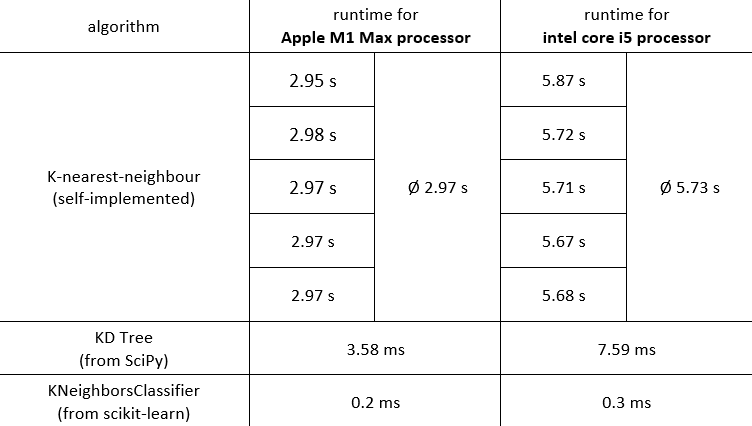

In [18]:
display (Image('Figures Report/Table_1.png',width='50%'))

It can be seen that especially for our KNN, the runtime of the _Macbook Pro14_ is significantly faster than the runtime of the _Lenovo Ideapad 5 laptop_. This is also the case for KD-Tree. For the KNeighboursClassifier, only a minimal difference of 0.1 ms can be seen. 
Furthermore, you can see that the runtime fluctuates by ±0.19 ms for the Lenovo Ideapad 5 for the first five test datapoints. The fluctuations are only ±0.03 ms for the MacBook Pro14.

## Accuracy of KNN, KD-Tree and KNeighborsClassifier
We have determined the accuracy of the three algorithms KNN, KD-Tree and KNeighborsClassifier. The result can be seen in Figure 4 for the k-values 2-10.

**Figure 4:** Accuracies of KNN, KD-Tree and KNeighborsClassifier for k=2-10

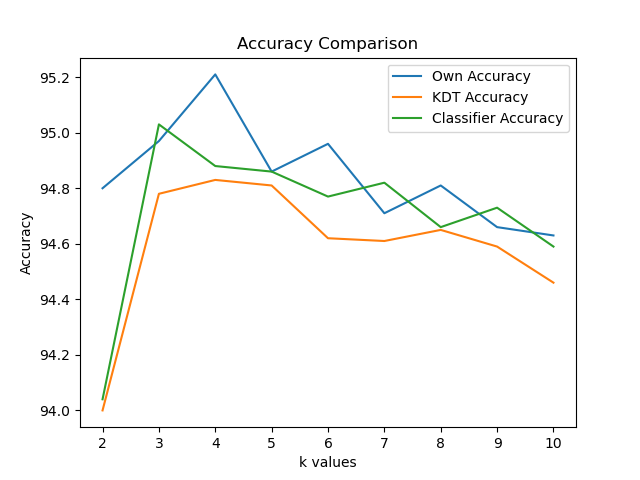

In [19]:
display (Image('Figures Report/plot_accuracies.png'))

The Accuracies are different for each algorithm. For the classifier (green), the best accuracy is at k=3. For our KNN (blue) and the KD tree (orange), the best accuracy is reached at k=4. Additionally, the accuracy is highest for our KNN.

## Principal components and the variance explained by them 

**Figure 5:** scatter plot of the train data set for the first 2 principal components after performing PCA

In [ ]:
display (Image('Figures Report/PCA_scatter_plot_mpl.png'))

When we look at the scatter plot for the first two principal components of the train data set, we can observe that correlations of the data set are not well captured at least for the first two dimensions (cf. Fig. 5). This is because the first two components only explain a combined variance of the data set of 10 % (cf. Fig. 6). Overall, the first 10 components individually explain very little variance in the dataset.

**Figure 6:** Explained variance for each individual principal component after performing PCA on the train data set

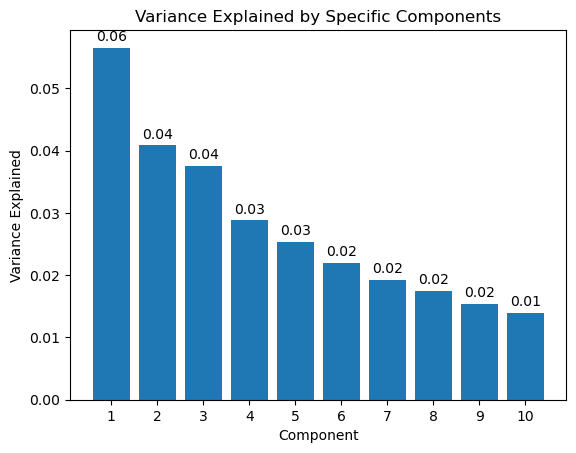

In [20]:
display (Image('Figures Report/variance_by_each_PC.png'))

**Figure 7:** Cumulative Explained Variance of the train data set for differing numbers of principal components

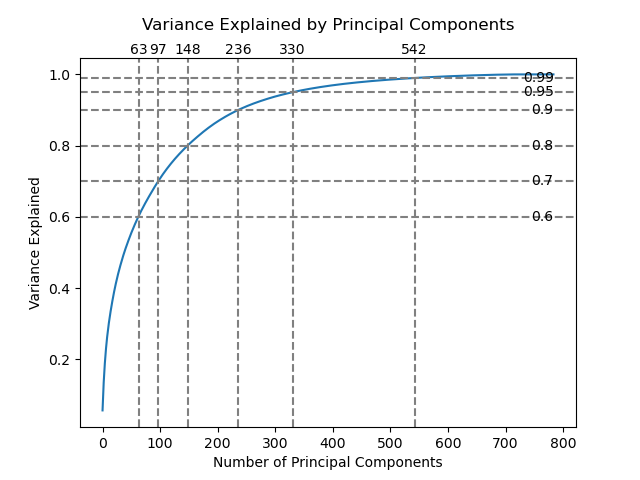

In [21]:
display (Image('Figures Report/cumulativ_variance_for_PCs.png'))

To explain a cumulative 60% of the variance of the train data set, 63 principal components are necessary. The value for the number of principal components that must be used to explain the variance of the dataset then increases to 330 at 95% (cf. Fig 7). However, with a loss of 5% of information, we can reduce the number of principal components by 454 to 330 from originally 784 dimensions, which will be especially important for the execution time of our algorithm. 

## Accuracy and execution time for differing numbers of Principal components
Since the accuracies calculated by the KNeighborsClassifier function and those calculated by our algorithm do not differ significantly, we used the former to calculate the accuracy of the algorithm with different numbers of principal components. We can see that the accuracy for the first principal components increases sharply and reaches a maximum at 75 components. This results in an accuracy of 95.67%. After that, however, the accuracy surprisingly drops to 94.83% for a number of 300 principal components and remains the same for up to 784 components (cf. Fig. 8). 

**Figure 8:** Accuracy calculated by KNeighborsClassifier from the scikit-learn library for different numbers of principal components

In [ ]:
display (Image('Figures Report/acuracy_No_PCs.png'))

**Figure 9:** Execution time of our algorithm for different values of cumulative explained variance of the test dataset

In [ ]:
display (Image('Figures Report/execution_time_PCs.png'))

Execution times for different numbers of principle components were measured on an M1 MacBook Air 2020 with 8 GB Computer memory. The average calculation time for different PC values on our KNN algorithm was run for 50 images each. This was then averaged and multiplied by the number of test data images to get an estimate of the execution time for all test images of the dataset at different PC values. 

If we compare the execution time of our algorithm with the number of Principle components, we first see a moderate increase in the execution time as the number of PCs increases. For a cumulative explained variance of 20% (6 principal components), only 0.26 hours are needed (cf. Fig. 9). However, the accuracy also drops significantly to 64.98%. To explain a cumulative variance of 64% (75 principal components), we need an execution time of 2.3 hours and achieve an accuracy of 95.89%. There is a much steeper increase if we want to explain 70% or more variance, then the number of principal components also increases sharply and there are significantly higher times to execute the algorithm. For example, in order to calculate the accuracy for different K-values at 95% cumulative explained variance an execution time of roughly 9 hours was required (cf. Fig. 9).

## Comparison: our KNN algorithm and Convolutional Neural Network (CNN) 
If we run our data set on a Convolutional Neural Network for 10 epochs, we get a validation accuracy of about 99.08%. This is even more than the already high accuracy of our KNN algorithm. For K=4 and 75 principal components we achieve an accuracy of 95.89% on our KNN classifier. 

## Error analysis
### dataset support
At the beginning of the error analysis, it is important to check the support of the dataset which means, if the dataset is balanced or not. This influences the method of calculating the macro average.

**Figure 10:** Relative share of each label in training- and testdataset

In [ ]:
display (Image('Figures Report/Figure_10.png'))

It can be noticed that the data only deviate by +/- 0.4%. Based on this plot, we come to the conclusion that the data sets are balanced.

### Our KNN code
The best accuracy we have achieved for our KNN code analysis was for k=4, which equals 96.89%. Figure 11 shown below shows exact classification result for each class.

**Figure 11:** Confusion matrix for our KNN algorithm

In [ ]:
display (Image('Figures Report/Table_1.png'))

Shown in the Table 2 the classification report indicates a specifically high accuracy for digit classes 0, 1 and 6, which tells the good performance of assigning the digits to the correct label class. Our KNN code struggled with digit class 9, achieving the lowest score, which tells us that there is a room for improvement of this algorithm. 
Both the macro average and weighted average metrics also have high scores of 0.96 for precision, recall, and F1-score. These average metrics provide an overall assessment of the model's performance across all classes, considering both class-specific performance and potential class imbalances. Since macro and weighted averages are equal, we can be assured that the data is balanced.

**Table 2:** Classification report for our KNN algorithm

In [ ]:
display (Image('Figures Report/Table_1.png'))

Overall, our KNN code performs accurately classifying digits to their own digit class, achieving a high accuracy rate. Further development and improvement of this code could potentially optimize the accuracy of the digit classes with lower scores and serve generally better accuracy score of the whole algorithm. 

# Discussion
## Runtime
The runtime is faster for KD-Tree than for our KNN because KD-Tree restricts the nearest neighbor search space and therefore not all 60000 training data points are compared to the test datapoint (Haran, 2022). KNeighborsClassifier is the fastest of the three algorithms and the explanations for this are as follows: First, the classifier automatically decides which parameters to choose to get the fastest and most accurate computation (scikit-learn). Another assumption would be that The KNeighborsClassifier uses optimized libraries in the background to perform calculations efficiently. These libraries could be written in C or C++, which would speed up the computation (Thattil, 2021). Ultimately, it could also be that nearest neighbor searches run on multiple CPU cores, which would increase computing power (Geissler, 2019). 
The _Macbook 14Pro_ is significantly faster than the _Lenovo Ideapad 5-15ITL05_ because the Apple M1 Pro processor is more powerful than the Intel® Core™ i5 processor (Kasperek et al., 2022). The structure of the Apple processor, especially the cache system, is responsible for the performance strength of this processor (Ernst, 2021). The Intel® Core™ i5 processor is slower than the Apple M1 Pro processor, but the accuracy remains the same (Kasperek et al., 2022).

## Accuracies
Normally, one would expect the accuracies to remain the same regardless of the algorithm. Nevertheless, there are minimal deviations that can be explained as follows. First, the rounding of the euclidean distance could be different in the three algorithms. We cannot track to which decimal place those are rounded. If the rounding is different, it can lead to a change in the list of most common neighbors and thus to different predictions. Another explanation could be that if there are several equal euclidean distances, that each algorithm decides differently which neighbor comes into the most common neighbor list. When calculating the accuracy for even k-values, it can happen that two labels appear equally often in the list of the most common labels. If this is the case, the algorithm chooses the label, which is in the first line of the most common neighbors list (Yuvaraaj). It may be that the KD-tree of SciPy and the KNeighboursClassifier have a different selection process in this case.

## Best k-value
The best k-value for our KNN algorithm is 4. This value is surprisingly small considering that we have a total of 60,000 training images. The reason for this is that the data are all relatively close together and the euclidean distances have a small deviation. This assumption could be proven true by viewing our euclidean distances (list is stored in our repository).

## PCA, accuracy and execution time
Surprisingly, decreasing the number of principal components in KNN algorithm, increases our accuracy as can be seen in Fig. 4. Since we have only changed the number of principal components as a parameter in the calculation, the decrease must be due to this. The dimensionality reduction performed using PCA can help alleviate the curse of dimensionality and improve the performance of the algorithm. The curse of dimensionality is a phenomenon that occurs when working with high-dimensional data. It refers to the challenges and limitations that arise as the number of dimensions increases relative to the available data points. In high-dimensional spaces, data becomes sparse, and the volume of the space grows exponentially. This sparsity makes it difficult to find meaningful patterns and relationships, leading to issues such as increased computational complexity and unreliable similarity measures (Grant, 2019). The K-Nearest Neighbors algorithm is based on the assumption that a given data point can be assigned to a class of data points based on closer distance compared to other data points of a data set. However, as the dimensions increase, the measured distances of the train data point to the test data points increases dramatically and it becomes more difficult to distinguish KNN and other data points within the training set based on closer distances. With higher dimensions, the density of the data set decreases. In order to maintain the distances for the KNN as a distinguishing criterion, the data set would therefore have to be enlarged (Weinberger, 2017). However, since we have a relatively large amount of data available with 60,000 images in the train dataset, the drop is probably not as significant for a large number of PCs as described in other empirical experiments- 
To overcome the curse of dimensionality techniques to reduce dimensionality, such as PCA are necessary. For our algorithm we employed PCA. We can assume that this in turn improved the performance of out machine learning algorithms on high-dimensional MNIST dataset (Meigarom, 2017).  

Furthermore, we can observe that the culminated variance achieved by the principal components and the time our algorithm needs to be executed are inversely correlated. A particularly high number of principle components shows a particularly high execution time, but also a stronger explanation of the variance, hence less information loss. The increase in execution time is due to the fact that more distance measurements have to be carried out in an n-dimensional space, where n is the number of dimensions, i.e. the number of principle components. For our calculations we have mostly assumed a target value of 95% cumulative explained variance, which corresponds to 330 principal components. With a K-value of 4, we thus achieved an accuracy of 95.21%. However, we see that a calculation with a cumulative explained variance of 0.64, respectively 75 PCs, could not only have led to a significantly lower execution time of 2.3 hours, compared to roughly 9 hours with a value of 95% cumulative explained variance, but also to an increase in accuracy to 95.89% in comparison. We can conclude that dimension reduction is not only an important step to significantly increase efficiency of our classifier but can also increase its accuracy. 

## CNN vs. KNN
Comparing CNN to our KNN classifier, we can see that the accuracy calculated using CNN is higher compared to KNN. Although the two methods of classification are very different overall and we can detect a deviation in accuracy, we have not carried out statistical tests to be able to say with certainty whether the deviations in this accuracy are significant. However, we can give a few reasons why CNNs may work better than our classic lazy, non-parametric, unsupervised KNN algorithm. CNN leverages convolutional layers to extract local features by scanning the input and capturing local patterns and features in a hierarchical order. This local feature extraction capability allows CNNs to learn and recognize relevant features automatically, such as edges, textures, or shapes, which are important for discriminating between different classes in images. KNN, on the other hand, does not have this inherent ability to learn and extract such discriminative features from raw input data. Furthermore, CNN performs end-to-end optimization as it is executed. This enables the network to learn the optimal set of weights and biases directly from the data, optimizing the classification performance, something that our KNN algorithm cannot do (Alzubaidi et al., 2021).

##